### Multiple Linear Regression

In [1]:
#import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#import the data set and splite it into xand y 
dataset = pd.read_csv('Multiple_Linear_Regression.csv')
print(dataset)
x = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

    R&D Spend  Administration  Marketing Spend       State     Profit
0   165349.20       136897.80        471784.10    New York  192261.83
1   162597.70       151377.59        443898.53  California  191792.06
2   153441.51       101145.55        407934.54     Florida  191050.39
3   144372.41       118671.85        383199.62    New York  182901.99
4   142107.34        91391.77        366168.42     Florida  166187.94
5   131876.90        99814.71        362861.36    New York  156991.12
6   134615.46       147198.87        127716.82  California  156122.51
7   130298.13       145530.06        323876.68     Florida  155752.60
8   120542.52       148718.95        311613.29    New York  152211.77
9   123334.88       108679.17        304981.62  California  149759.96
10  101913.08       110594.11        229160.95     Florida  146121.95
11  100671.96        91790.61        249744.55  California  144259.40
12   93863.75       127320.38        249839.44     Florida  141585.52
13   91992.39       

In [3]:
# print(dataset)
print(x)
print(y)

[[165349.2 136897.8 471784.1 'New York']
 [162597.7 151377.59 443898.53 'California']
 [153441.51 101145.55 407934.54 'Florida']
 [144372.41 118671.85 383199.62 'New York']
 [142107.34 91391.77 366168.42 'Florida']
 [131876.9 99814.71 362861.36 'New York']
 [134615.46 147198.87 127716.82 'California']
 [130298.13 145530.06 323876.68 'Florida']
 [120542.52 148718.95 311613.29 'New York']
 [123334.88 108679.17 304981.62 'California']
 [101913.08 110594.11 229160.95 'Florida']
 [100671.96 91790.61 249744.55 'California']
 [93863.75 127320.38 249839.44 'Florida']
 [91992.39 135495.07 252664.93 'California']
 [119943.24 156547.42 256512.92 'Florida']
 [114523.61 122616.84 261776.23 'New York']
 [78013.11 121597.55 264346.06 'California']
 [94657.16 145077.58 282574.31 'New York']
 [91749.16 114175.79 294919.57 'Florida']
 [86419.7 153514.11 0.0 'New York']
 [76253.86 113867.3 298664.47 'California']
 [78389.47 153773.43 299737.29 'New York']
 [73994.56 122782.75 303319.26 'Florida']
 [67532

In [4]:
# encoding the categorial data and creating the dummy variables 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
x[:,3] = le.fit_transform(x[:,3])
#ohe = OneHotEncoder(categorical_features = [3])
ohe = ColumnTransformer(transformers =[('encoder' ,OneHotEncoder() ,[3])], remainder = 'passthrough')
x = np.array(ohe.fit_transform(x))
print(x)

[[0.0 0.0 1.0 165349.2 136897.8 471784.1]
 [1.0 0.0 0.0 162597.7 151377.59 443898.53]
 [0.0 1.0 0.0 153441.51 101145.55 407934.54]
 [0.0 0.0 1.0 144372.41 118671.85 383199.62]
 [0.0 1.0 0.0 142107.34 91391.77 366168.42]
 [0.0 0.0 1.0 131876.9 99814.71 362861.36]
 [1.0 0.0 0.0 134615.46 147198.87 127716.82]
 [0.0 1.0 0.0 130298.13 145530.06 323876.68]
 [0.0 0.0 1.0 120542.52 148718.95 311613.29]
 [1.0 0.0 0.0 123334.88 108679.17 304981.62]
 [0.0 1.0 0.0 101913.08 110594.11 229160.95]
 [1.0 0.0 0.0 100671.96 91790.61 249744.55]
 [0.0 1.0 0.0 93863.75 127320.38 249839.44]
 [1.0 0.0 0.0 91992.39 135495.07 252664.93]
 [0.0 1.0 0.0 119943.24 156547.42 256512.92]
 [0.0 0.0 1.0 114523.61 122616.84 261776.23]
 [1.0 0.0 0.0 78013.11 121597.55 264346.06]
 [0.0 0.0 1.0 94657.16 145077.58 282574.31]
 [0.0 1.0 0.0 91749.16 114175.79 294919.57]
 [0.0 0.0 1.0 86419.7 153514.11 0.0]
 [1.0 0.0 0.0 76253.86 113867.3 298664.47]
 [0.0 0.0 1.0 78389.47 153773.43 299737.29]
 [0.0 1.0 0.0 73994.56 122782.75 3

In [5]:
# avoiding dummy variable trap
x = x[:,1:]
print(x)
x = np.append(arr = np.ones((50,1)).astype(int), values = x, axis = 1)
print('x after adding the intercept')
print(x)

[[0.0 1.0 165349.2 136897.8 471784.1]
 [0.0 0.0 162597.7 151377.59 443898.53]
 [1.0 0.0 153441.51 101145.55 407934.54]
 [0.0 1.0 144372.41 118671.85 383199.62]
 [1.0 0.0 142107.34 91391.77 366168.42]
 [0.0 1.0 131876.9 99814.71 362861.36]
 [0.0 0.0 134615.46 147198.87 127716.82]
 [1.0 0.0 130298.13 145530.06 323876.68]
 [0.0 1.0 120542.52 148718.95 311613.29]
 [0.0 0.0 123334.88 108679.17 304981.62]
 [1.0 0.0 101913.08 110594.11 229160.95]
 [0.0 0.0 100671.96 91790.61 249744.55]
 [1.0 0.0 93863.75 127320.38 249839.44]
 [0.0 0.0 91992.39 135495.07 252664.93]
 [1.0 0.0 119943.24 156547.42 256512.92]
 [0.0 1.0 114523.61 122616.84 261776.23]
 [0.0 0.0 78013.11 121597.55 264346.06]
 [0.0 1.0 94657.16 145077.58 282574.31]
 [1.0 0.0 91749.16 114175.79 294919.57]
 [0.0 1.0 86419.7 153514.11 0.0]
 [0.0 0.0 76253.86 113867.3 298664.47]
 [0.0 1.0 78389.47 153773.43 299737.29]
 [1.0 0.0 73994.56 122782.75 303319.26]
 [1.0 0.0 67532.53 105751.03 304768.73]
 [0.0 1.0 77044.01 99281.34 140574.81]
 [0

In [6]:
# splitting the data in train and test 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x ,y, test_size = 0.2, random_state = 0)

In [7]:
# fitting multiple linear regression 
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### perdicting the result

In [8]:
y_pred = lr.predict(x_test)

In [9]:
import sklearn.metrics as met
mse = met.mean_squared_error(y_test,y_pred)
print('MSE : ',mse)
r2 = met.r2_score(y_test, y_pred)
print("R-Square_score : ",r2)
rmse = np.sqrt(mse)
print('RMSE : ',rmse)

MSE :  83502864.03250703
R-Square_score :  0.9347068473282975
RMSE :  9137.990152791095


In [10]:
#printing and verifing the answer 
print(y_test)
np.set_printoptions(precision = 2)
print(y_pred)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[103282.38 144259.4  146121.95  77798.83 191050.39 105008.31  81229.06
  97483.56 110352.25 166187.94]
[103015.2  132582.28 132447.74  71976.1  178537.48 116161.24  67851.69
  98791.73 113969.44 167921.07]
[[103015.2  103282.38]
 [132582.28 144259.4 ]
 [132447.74 146121.95]
 [ 71976.1   77798.83]
 [178537.48 191050.39]
 [116161.24 105008.31]
 [ 67851.69  81229.06]
 [ 98791.73  97483.56]
 [113969.44 110352.25]
 [167921.07 166187.94]]


### Backward Elimination

In [11]:
import statsmodels.api as sm
x_optimal = x
x_optimal = np.array(x_optimal, dtype = float)
print("x_optimal with all the feature")
print(x_optimal)
sl =0.05
numVars = len(x_optimal[0])
for i in range(0,numVars):
    reg = sm.OLS(endog = y, exog = x_optimal).fit()
    max_p_value = max(reg.pvalues).astype(float)
    if max_p_value >sl:
        for j in range(0, numVars-i):
            if(reg.pvalues[j].astype(float)==max_p_value):
                x_optimal = np.delete(x_optimal,j,1)
    print(reg.summary())
print('x_optimal with the most significant feature')
print(x_optimal)

x_optimal with all the feature
[[1.00e+00 0.00e+00 1.00e+00 1.65e+05 1.37e+05 4.72e+05]
 [1.00e+00 0.00e+00 0.00e+00 1.63e+05 1.51e+05 4.44e+05]
 [1.00e+00 1.00e+00 0.00e+00 1.53e+05 1.01e+05 4.08e+05]
 [1.00e+00 0.00e+00 1.00e+00 1.44e+05 1.19e+05 3.83e+05]
 [1.00e+00 1.00e+00 0.00e+00 1.42e+05 9.14e+04 3.66e+05]
 [1.00e+00 0.00e+00 1.00e+00 1.32e+05 9.98e+04 3.63e+05]
 [1.00e+00 0.00e+00 0.00e+00 1.35e+05 1.47e+05 1.28e+05]
 [1.00e+00 1.00e+00 0.00e+00 1.30e+05 1.46e+05 3.24e+05]
 [1.00e+00 0.00e+00 1.00e+00 1.21e+05 1.49e+05 3.12e+05]
 [1.00e+00 0.00e+00 0.00e+00 1.23e+05 1.09e+05 3.05e+05]
 [1.00e+00 1.00e+00 0.00e+00 1.02e+05 1.11e+05 2.29e+05]
 [1.00e+00 0.00e+00 0.00e+00 1.01e+05 9.18e+04 2.50e+05]
 [1.00e+00 1.00e+00 0.00e+00 9.39e+04 1.27e+05 2.50e+05]
 [1.00e+00 0.00e+00 0.00e+00 9.20e+04 1.35e+05 2.53e+05]
 [1.00e+00 1.00e+00 0.00e+00 1.20e+05 1.57e+05 2.57e+05]
 [1.00e+00 0.00e+00 1.00e+00 1.15e+05 1.23e+05 2.62e+05]
 [1.00e+00 0.00e+00 0.00e+00 7.80e+04 1.22e+05 2.64e+05]


In [12]:
x_tr, x_te,y_tr,y_te = train_test_split(x_optimal,y,test_size = 0.25, random_state = 0)
lr_optimal = LinearRegression()
lr_optimal.fit(x_tr,y_tr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
from sklearn.linear_model import LinearRegression
y_pr = lr_optimal.predict(x_te)
np.set_printoptions(precision = 2)
print(np.concatenate((y_pr.reshape(len(y_pr),1),y_te.reshape(len(y_te),1)),1))

[[104560.72 103282.38]
 [134156.64 144259.4 ]
 [135217.63 146121.95]
 [ 71940.15  77798.83]
 [179267.65 191050.39]
 [109737.87 105008.31]
 [ 65389.02  81229.06]
 [100358.93  97483.56]
 [111350.98 110352.25]
 [169578.42 166187.94]
 [ 95535.39  96778.92]
 [ 87431.3   96479.51]
 [112491.64 105733.54]]


In [14]:
import sklearn.metrics as met
mse = met.mean_squared_error(y_te,y_pr)
print('MSE : ',mse)
r2 = met.r2_score(y_te, y_pr)
print("R-Square_score : ",r2)
rmse = np.sqrt(mse)
print('RMSE : ',rmse)

MSE :  62991228.77211678
R-Square_score :  0.9416094803899032
RMSE :  7936.701378539877


### 3D Model

<IPython.core.display.Javascript object>


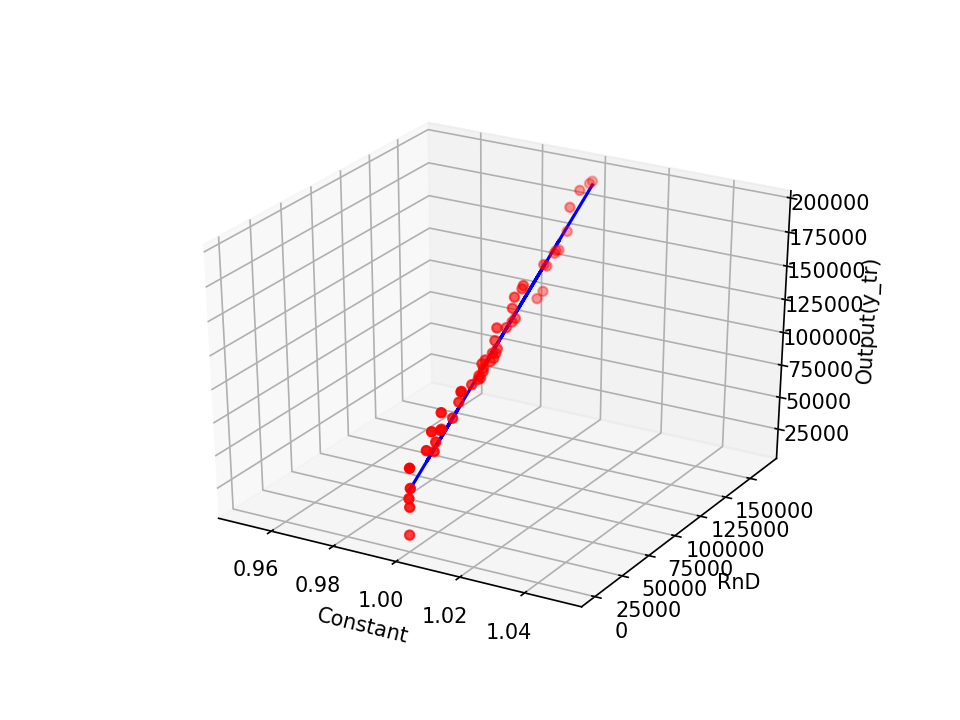

Text(0.5, 0, 'Output(y_tr)')

In [16]:
%matplotlib notebook
from mpl_toolkits import mplot3d
ax = plt.figure().add_subplot(projection = '3d')
ax.scatter3D(x_optimal[:,0],x_optimal[:,1],y,c = 'red')
ax.plot3D(x_optimal[:,0],x_optimal[:,1],lr_optimal.predict(x_optimal), c ='blue')
ax.set_xlabel('Constant')
ax.set_ylabel('RnD')
ax.set_zlabel('Output(y_tr)')